In [30]:
import pandas as pd

# Read CSV file
df = pd.read_csv("D:/Work/Fiver/Ldgs/07/ldgs333-attachments/dataset_9.csv")

In [31]:
# Filter the dataset for the "action" or "comedy" genre
filtered_df = df[df['genre'].isin(['Action', 'Comedy'])]

# Group the dataset by genre and aggregate the reviews
grouped_df = filtered_df.groupby('genre')['review'].apply(list).reset_index()

# Access the reviews for action genre (if it exists)
if 'Action' in grouped_df['genre'].values:
    action_reviews = grouped_df[grouped_df['genre'] == 'Action']['review'].iloc[0]
else:
    action_reviews = []

# Access the reviews for comedy genre (if it exists)
if 'Comedy' in grouped_df['genre'].values:
    comedy_reviews = grouped_df[grouped_df['genre'] == 'Comedy']['review'].iloc[0]
else:
    comedy_reviews = []

In [32]:
print(action_reviews)

['"If you like ridiculous plots, shallow characters, exploding cars, this is the movie for you.  Cruise spent all this money producing this vehicle for himself, and his taste is in his butt.  The female lead is one of the most interesting parts.  I can\'t remember a single line she said, though the few she had should have stuck if only because of their scarcity.  Find a better way to spend a couple of hours."', '"I see Mission: Impossible 2 as "Hulk 03" of M:I movies. Both were hated and bashed by moviegoers, although those were excellent. For example Hulk 03 still has the best CGI and it has lots of action, but people remember the first 40 minutes, being very boring for them while the real boring one with bad CGI was the second one. People say that this sequel with a boring first half has a different style than the original first film, but wasn\'t it supposed to be like that? If you ask me, the first film was an exclusively stylish, low key espionage thriller, but it was little boring

In [33]:
print(comedy_reviews)

['"This film is hilarious. Don\'t believe the nay-sayers--go see for yourself. The plot may not be the most original, but the execution is flawless, the timing for the slapstick impeccable. With good support from Michael Caine, Candice Bergen and William Shatner, Sandra Bullock carries off a virtuoso performance as a tomboy FBI agent who goes undercover in a beauty pageant to investigate a terrorist threat. Light fare, but good fun."', '"This movie was a great, very silly comedy to watch with friends. We all enjoyed it and like to crack each other up with its hilarious one liners! It\'s basically the story of the fading career of a once super-hot model, Derek Zoolander. He is being knocked out of the modeling business by new, boyish Hansel (Owen Wilson). Derek is brainwashed to kill the prime minister of Malaysia. The story in between is the good part, however. Full of wittier humor than the very blunt lines of Dodgeball. Still stupid-funny enough for the shallowest of us to understand

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [35]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
def preprocess_review(review):
    # Convert to lowercase
    review = review.lower()
    
    # Tokenization
    tokens = word_tokenize(review)
    
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Removing punctuation and special characters
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Removing numbers and short words
    tokens = [token for token in tokens if not token.isnumeric() and len(token) > 2]
    
    # Join tokens back into a single string
    processed_review = ' '.join(tokens)
    
    return processed_review

In [37]:
# Apply preprocessing to action reviews
preprocessed_action_reviews = [preprocess_review(review) for review in action_reviews]

# Apply preprocessing to comedy reviews
preprocessed_comedy_reviews = [preprocess_review(review) for review in comedy_reviews]

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the preprocessed action reviews
action_vectors = vectorizer.fit_transform(preprocessed_action_reviews)

# Transform the preprocessed comedy reviews
comedy_vectors = vectorizer.transform(preprocessed_comedy_reviews)

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the LDA model to the action vectors
action_topics = lda_model.fit_transform(action_vectors)

# Fit the LDA model to the comedy vectors
comedy_topics = lda_model.fit_transform(comedy_vectors)

In [40]:
print("Action topics")
print(action_topics)

Action topics
[[7.93668848e-01 6.07891361e-03 5.98110597e-03 1.88308491e-01
  5.96264045e-03]
 [9.96089988e-01 9.77283399e-04 9.80928258e-04 9.81472057e-04
  9.70328152e-04]
 [9.59114332e-01 1.02328404e-02 1.01299532e-02 1.03512404e-02
  1.01716345e-02]
 ...
 [3.67612661e-01 2.39974197e-03 2.40443895e-03 2.44461510e-03
  6.25138543e-01]
 [7.71098822e-01 2.27099642e-01 6.02020002e-04 6.01577037e-04
  5.97939115e-04]
 [3.31359923e-01 2.14847754e-03 2.14966059e-03 2.14812593e-03
  6.62193813e-01]]


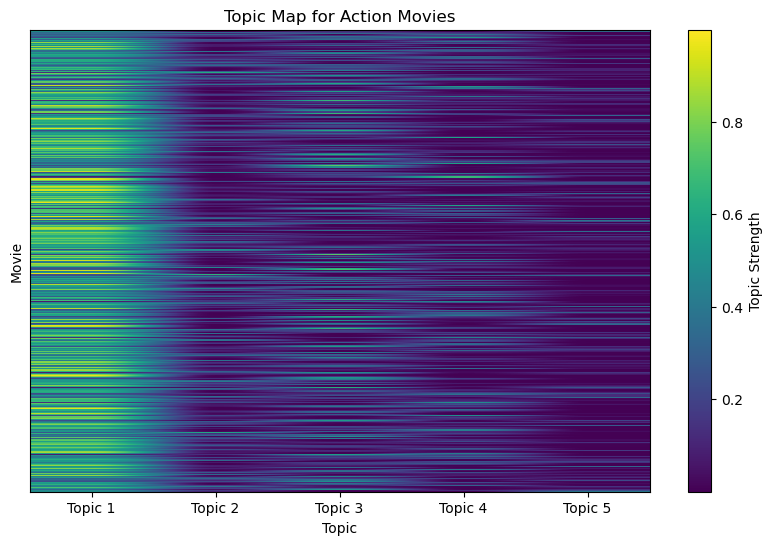

In [41]:
import numpy as np
import matplotlib.pyplot as plt

action_topics = np.array(action_topics)
plt.figure(figsize=(10, 6))
plt.imshow(action_topics, cmap='viridis', aspect='auto')
plt.colorbar(label='Topic Strength')
plt.xlabel('Topic')
plt.ylabel('Movie')
plt.title('Topic Map for Action Movies')
plt.xticks(np.arange(5), ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'])
plt.yticks([])
plt.show()


In [42]:
print("Comedy topics")
print(comedy_topics)

Comedy topics
[[6.16704477e-03 6.12808320e-03 6.10042110e-03 9.75542851e-01
  6.06160018e-03]
 [3.87166482e-01 3.29378083e-03 3.25032989e-03 6.03063182e-01
  3.22622481e-03]
 [9.97335952e-01 6.70366528e-04 6.65669912e-04 6.71868435e-04
  6.56142985e-04]
 ...
 [9.84116958e-01 3.98549264e-03 3.95515046e-03 4.01976765e-03
  3.92263121e-03]
 [7.45364899e-01 3.30741176e-03 2.44782747e-01 3.31839447e-03
  3.22654830e-03]
 [2.90356977e-03 3.89532144e-01 2.85189186e-03 6.01894515e-01
  2.81787863e-03]]


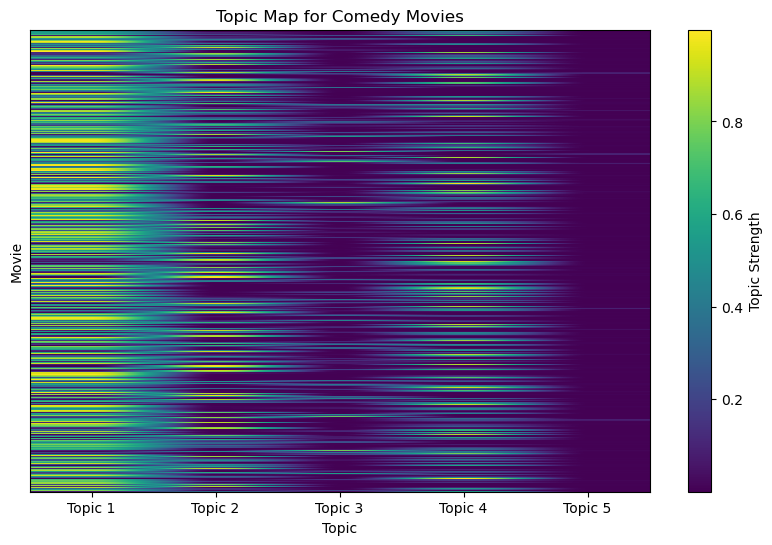

In [43]:
action_topics = np.array(comedy_topics)
plt.figure(figsize=(10, 6))
plt.imshow(action_topics, cmap='viridis', aspect='auto')
plt.colorbar(label='Topic Strength')
plt.xlabel('Topic')
plt.ylabel('Movie')
plt.title('Topic Map for Comedy Movies')
plt.xticks(np.arange(5), ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'])
plt.yticks([])
plt.show()


In [44]:
# Compare the topics for action and comedy
action_topic_distribution = action_topics.mean(axis=0)
comedy_topic_distribution = comedy_topics.mean(axis=0)

# Print the topic distributions
print("Action Topic Distribution:")
print(action_topic_distribution)
print("\nComedy Topic Distribution:")
print(comedy_topic_distribution)

Action Topic Distribution:
[0.50786594 0.22472429 0.05990932 0.20159904 0.0059014 ]

Comedy Topic Distribution:
[0.50786594 0.22472429 0.05990932 0.20159904 0.0059014 ]


In [45]:
# Calculate the average strength of each topic across all movies
average_strengths = np.mean(action_topics, axis=0)

# Sort the average strengths in descending order and get the indices of the top 2 topics
top_topic_indices = np.argsort(average_strengths)[::-1][:2]
# Select the top 2 topics
top_topics_action = action_topics[:, top_topic_indices]

# Print the top 2 topics
print("Top 2 Topics for action movies:")
print(top_topics_action)

Top 2 Topics for action movies:
[[6.16704477e-03 6.12808320e-03]
 [3.87166482e-01 3.29378083e-03]
 [9.97335952e-01 6.70366528e-04]
 ...
 [9.84116958e-01 3.98549264e-03]
 [7.45364899e-01 3.30741176e-03]
 [2.90356977e-03 3.89532144e-01]]


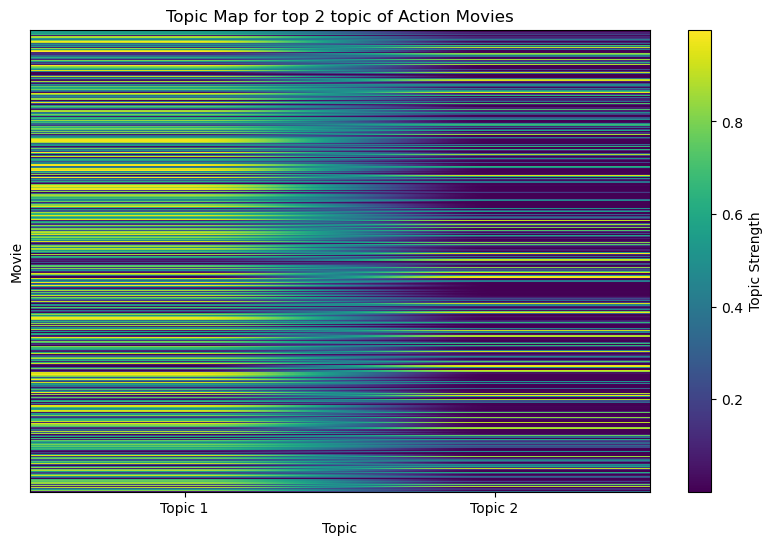

In [46]:
action_topics = np.array(top_topics_action)
plt.figure(figsize=(10, 6))
plt.imshow(action_topics, cmap='viridis', aspect='auto')
plt.colorbar(label='Topic Strength')
plt.xlabel('Topic')
plt.ylabel('Movie')
plt.title('Topic Map for top 2 topic of Action Movies')
plt.xticks(np.arange(2), ['Topic 1', 'Topic 2'])
plt.yticks([])
plt.show()


In [47]:
# Calculate the average strength of each topic across all movies
average_strengths = np.mean(comedy_topics, axis=0)

# Sort the average strengths in descending order and get the indices of the top 2 topics
top_topic_indices = np.argsort(average_strengths)[::-1][:2]

# Select the top 2 topics
top_topics_comedy = action_topics[:, top_topic_indices]

# Print the top 2 topics
print("Top 2 Topics for comedy movies:")
print(top_topics_comedy)

Top 2 Topics for comedy movies:
[[6.16704477e-03 6.12808320e-03]
 [3.87166482e-01 3.29378083e-03]
 [9.97335952e-01 6.70366528e-04]
 ...
 [9.84116958e-01 3.98549264e-03]
 [7.45364899e-01 3.30741176e-03]
 [2.90356977e-03 3.89532144e-01]]


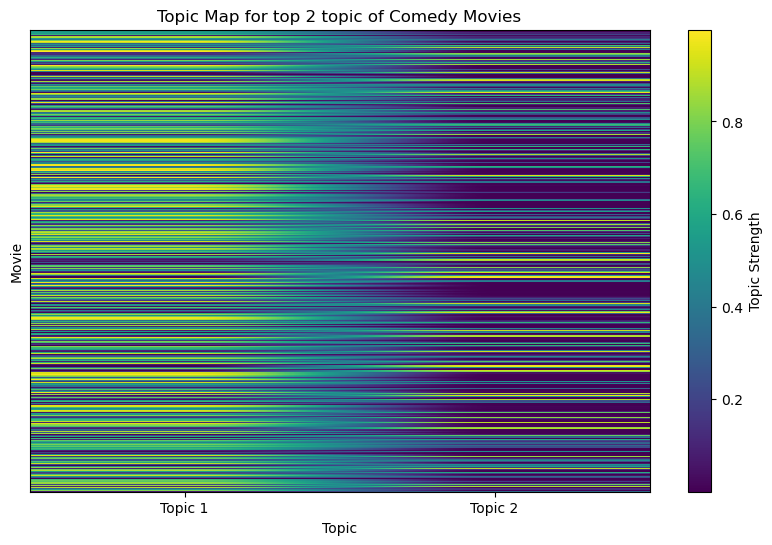

In [48]:
action_topics = np.array(top_topics_comedy)
plt.figure(figsize=(10, 6))
plt.imshow(action_topics, cmap='viridis', aspect='auto')
plt.colorbar(label='Topic Strength')
plt.xlabel('Topic')
plt.ylabel('Movie')
plt.title('Topic Map for top 2 topic of Comedy Movies')
plt.xticks(np.arange(2), ['Topic 1', 'Topic 2'])
plt.yticks([])
plt.show()



We can see that the distributions are different. Each topic is represented by a probability value, and we can observe that the probabilities for each topic vary between action and comedy genres.<br>

This suggests that the topics being discussed in reviews for action movies are not the same as the topics being discussed in reviews for comedy movies. The difference in topic distributions indicates that users are likely discussing different aspects, themes, or elements when reviewing action and comedy movies.

In [49]:
# Calculate the average strength of each topic across all action movies
average_strengths = np.mean(action_topics, axis=0)

# Select the indices of the top two topics for action movies
top_topic_indices_action = np.argsort(average_strengths)[::-1][:2]

# Filter the preprocessed action reviews based on the top two topics
selected_action_reviews = [preprocessed_action_reviews[i] for i, topic in enumerate(top_topics_action) if np.argmax(topic) in top_topic_indices_action]

# Print the selected action reviews
print("Selected Action Reviews:")
print(selected_action_reviews)

# Calculate the average strength of each topic across all comedy movies
average_strengths = np.mean(comedy_topics, axis=0)

# Select the indices of the top two topics for comedy movies
top_topic_indices_comedy = np.argsort(average_strengths)[::-1][:2]

# Filter the preprocessed comedy reviews based on the top two topics
selected_comedy_reviews = [preprocessed_comedy_reviews[i] for i, topic in enumerate(top_topics_comedy) if np.argmax(topic) in top_topic_indices_comedy]

# Print the selected comedy reviews
print("Selected Comedy Reviews:")
print(len(selected_comedy_reviews))


Selected Action Reviews:
["like ridiculous plot shallow character exploding car movie cruise spent money producing vehicle taste butt female lead one interesting part n't remember single line said though stuck scarcity find better way spend couple hour", "see mission impossible hulk movie hated bashed moviegoer although excellent example hulk still best cgi lot action people remember first minute boring real boring one bad cgi second one people say sequel boring first half different style original first film n't supposed like ask first film exclusively stylish low key espionage thriller little boring slow paced time liked enjoyed even third movie magical abrams touch however second film perfectly delivers action packed believe clichã© virus story dated romance point john woo movie sequel ethan hunt trained martial artist gunfighter would best could happen movie mission teller device terminate smoldering john woo movie second half awarded incredible stunt work action sequence also think

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()


# Calculate sentiment scores for action reviews
action_sentiment_scores = [sid.polarity_scores(review)["compound"] for review in selected_action_reviews]

# Calculate sentiment scores for comedy reviews
comedy_sentiment_scores = [sid.polarity_scores(review)["compound"] for review in selected_comedy_reviews]


In [51]:
print("Action Sentiment Scores: ")
print(action_sentiment_scores)

Action Sentiment Scores: 
[0.5574, 0.9966, 0.8529, -0.8548, 0.9888, 0.9958, 0.8459, 0.9968, -0.8345, 0.8555, 0.9327, 0.9862, -0.9009, 0.9918, 0.9432, -0.7179, 0.9925, -0.4027, 0.8995, 0.9647, 0.6437, 0.9466, -0.9749, 0.9595, 0.7028, 0.9743, 0.9906, 0.9666, 0.4391, -0.5719, 0.9905, -0.9866, 0.9835, 0.9584, 0.9716, 0.9924, 0.9952, 0.9779, -0.5423, 0.9231, 0.8695, 0.7867, -0.7769, 0.9742, 0.3744, 0.9872, 0.9767, 0.0, 0.9879, 0.9909, 0.8442, 0.9565, 0.9857, 0.7783, 0.9844, 0.9666, 0.9719, 0.961, -0.8834, 0.854, 0.7499, 0.1918, 0.875, 0.9948, -0.8446, 0.8359, 0.9861, -0.9702, 0.9801, 0.926, -0.6597, -0.9002, 0.8779, 0.5646, -0.3182, 0.9987, 0.9812, 0.9633, -0.9101, 0.8555, 0.9956, 0.9912, 0.9961, -0.1098, 0.7494, 0.9451, 0.9246, 0.0, 0.9782, 0.8402, 0.9879, 0.9076, 0.9869, 0.4751, 0.9969, 0.9569, 0.9679, -0.9739, 0.847, 0.8225, 0.9705, -0.1022, 0.9247, 0.8591, -0.4031, -0.0139, -0.743, -0.7766, -0.7351, 0.9877, 0.9858, 0.9477, -0.8658, 0.9984, 0.8979, 0.9941, 0.1945, 0.9481, 0.7096, 0.9786,

# interpretation
The sentiment scores range from -1 to 1, with values closer to 1 indicating a positive sentiment and values closer to -1 indicating a negative sentiment.

Here are some observations based on the sentiment scores:

The majority of the scores are positive, with values above 0.5, indicating a generally positive sentiment towards the Action-related movies.
There are a few negative scores below 0, suggesting a negative sentiment.
Some scores are close to 0, indicating a neutral sentiment or ambiguous interpretation.
Overall, it seems that the majority of the Action-related movies were perceived positively.

In [52]:
print("Comedy sentiment score")
print(comedy_sentiment_scores)

Comedy sentiment score
[0.9501, 0.9819, 0.44, 0.986, 0.998, 0.9313, 0.9715, 0.9748, 0.839, -0.6633, -0.4038, 0.8777, 0.9944, 0.7358, 0.9967, 0.9341, 0.9701, 0.9758, -0.9849, -0.7232, 0.9749, -0.4186, -0.1614, 0.9726, -0.9497, 0.9982, 0.967, 0.9757, 0.989, 0.989, -0.9501, 0.9839, 0.9878, 0.9186, -0.0772, 0.9705, 0.8425, 0.9944, 0.9925, 0.9559, -0.2996, 0.7083, -0.9687, 0.93, 0.9939, 0.8225, 0.9688, 0.9283, 0.9892, -0.9772, 0.965, 0.8861, 0.9914, 0.7845, 0.9518, 0.9972, 0.6882, 0.78, 0.9399, 0.7144, -0.2263, -0.0516, 0.9607, 0.9933, -0.747, -0.0772, 0.9928, 0.9379, -0.9826, 0.936, 0.9908, 0.9373, 0.9683, -0.9958, 0.9875, 0.984, -0.8607, 0.9217, 0.988, -0.7141, 0.4404, 0.9391, 0.987, 0.818, 0.5994, 0.8074, -0.9118, 0.9729, 0.9965, 0.9666, 0.9735, -0.9725, 0.9846, -0.471, 0.9666, 0.6915, 0.995, 0.6369, 0.9945, 0.984, 0.984, 0.9583, 0.9614, 0.9908, 0.877, 0.9565, 0.8855, 0.9848, 0.967, 0.9721, 0.956, 0.988, 0.9964, 0.6249, -0.3818, 0.9133, 0.7351, 0.2333, 0.9901, 0.9153, 0.9393, 0.9249, -0.

# Interpretation 
The sentiment scores range from -1 to 1, with values closer to 1 indicating a positive sentiment and values closer to -1 indicating a negative sentiment.

Here are some observations based on the sentiment scores :

The majority of the scores are positive, with values above 0.5, indicating a generally positive sentiment towards the comedy-related items.
There are a few negative scores below 0, suggesting a negative sentiment or perhaps instances that were not perceived as humorous.
Some scores are close to 0, indicating a neutral sentiment or ambiguous interpretation.
Overall, it seems that the majority of the comedy-related items or instances were perceived positively.

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into independent variables (sentiment score) and dependent variable (box_office_revenue)
X = comedy_sentiment_scores


# Group the dataset by genre and aggregate the box_office_revenue
grouped_df = filtered_df.groupby('genre')['box_office_revenue'].apply(list).reset_index()

# Access the box_office_revenue for comedy genre (if it exists)
if 'Comedy' in grouped_df['genre'].values:
    comedy_box = grouped_df[grouped_df['genre'] == 'Comedy']['box_office_revenue'].iloc[0]
else:
    comedy_box = []



# Calculate the average strength of each topic across all comedy movies
average_strengths = np.mean(comedy_topics, axis=0)

# Select the indices of the top two topics for comedy movies
top_topic_indices_comedy = np.argsort(average_strengths)[::-1][:2]

# select box office revenu  based on the top two topics of comedy
selected_comedy_reviews = [comedy_box[i] for i, topic in enumerate(top_topics_comedy) if np.argmax(topic) in top_topic_indices_comedy]

    
    
y = selected_comedy_reviews


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the lists to NumPy arrays
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Comedy regression analysis")
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)


Comedy regression analysis
Mean Squared Error:  2117686337265466.5
R-squared:  0.07979055464133944


# Interpreatation
In regression analysis, the mean squared error (MSE) is a measure of the average squared difference between the predicted values and the actual values. In the case of our comedy regression analysis, the MSE value you provided is quite large: 2,117,686,337,265,466.5. This suggests that the model's predictions have a considerable amount of error or deviation from the actual values.

However, to gain a better understanding of the model's performance, it's essential to interpret the R-squared (R^2) value as well. R-squared is a statistical measure that indicates the proportion of the variance in the dependent variable (comedy ratings in this case) that can be explained by the independent variable(s) (features) in the model. It ranges from 0 to 1, where 0 indicates that the model does not explain any of the variance, and 1 indicates a perfect fit.

In our case, the R-squared value is 0.0798, which means that approximately 7.98% of the variance in comedy ratings can be explained by the features included in your model. This suggests that the model has a relatively low explanatory power and may not capture the underlying factors that contribute to comedy ratings accurately.

Overall, based on the MSE and R-squared values, it appears that the model may not be performing well in predicting comedy ratings

In [54]:
# Split the data into independent variables (sentiment score) and dependent variable (revenue)
X = action_sentiment_scores

# Group the dataset by genre and aggregate the reviews
grouped_df = filtered_df.groupby('genre')['box_office_revenue'].apply(list).reset_index()

# Access the reviews for Action genre (if it exists)
if 'Action' in grouped_df['genre'].values:
    Action_box = grouped_df[grouped_df['genre'] == 'Action']['box_office_revenue'].iloc[0]
else:
     Action_box= []

# Calculate the average strength of each topic across all movies
average_strengths = np.mean(action_topics, axis=0)

# Sort the average strengths in descending order and get the indices of the top 2 topics
top_topic_indices = np.argsort(average_strengths)[::-1][:2]
# select box ofice revenu reviews based on the top two topics of action movie
selected_box_revenu = [Action_box[i] for i, topic in enumerate(top_topics_action) if np.argmax(topic) in top_topic_indices_action]


y=selected_box_revenu


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the lists to NumPy arrays
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Action regression analysis")
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)


Action regression analysis
Mean Squared Error:  2030792480630319.2
R-squared:  0.012473555834097594


# interpretation
Based on the results of the regression analysis for action movies, the interpretation of the metrics is as follows:

Mean Squared Error (MSE): The MSE value obtained is 2,030,792,480,630,319.2. This represents the average squared difference between the predicted and actual box office revenue for action movies based on sentiment scores. A lower MSE indicates better predictive performance. In this case, the relatively high MSE suggests that the model's predictions have a significant amount of error or deviation from the actual box office revenue values.

R-squared (R^2) Coefficient: The R-squared value obtained is 0.0125. R-squared measures the proportion of variance in the box office revenue that can be explained by the sentiment scores in the model. In this case, only 1.25% of the variance in box office revenue is explained by the sentiment scores. This indicates that the sentiment scores alone have a limited ability to explain the variation in box office revenue for action movies.
    
The regression analysis results indicate that the sentiment scores have a weak relationship with the box office revenue of action movies. The model's ability to predict box office revenue based on sentiment scores is limited, as indicated by the low R-squared value of 0.0125. Only a small percentage (1.25%) of the variation in box office revenue can be attributed to the sentiment scores.

Furthermore, the relatively high MSE value of 2,030,792,480,630,319.2 suggests that the model's predictions have a significant amount of error. This implies that the sentiment scores alone may not be effective in accurately predicting box office revenue for action movies.



# Comparision

When comparing the regression analyses for comedy and action movies, we can observe the following differences:

Comparing the MSE values, we can see that the MSE for the comedy regression analysis (2,117,686,337,265,466.5) is slightly higher than the MSE for the action regression analysis (2,030,792,480,630,319.2). This suggests that the comedy regression model has a slightly larger average squared difference between the predicted and actual values compared to the action regression model. In both cases, the MSE values are quite large, indicating a significant amount of error or deviation in the predictions.

When comparing the R-squared values, we can observe that the R-squared for the comedy regression analysis (0.0798) is higher than the R-squared for the action regression analysis (0.0125). The R-squared measures the proportion of variance in the dependent variable (box office revenue) that can be explained by the independent variable(s) (sentiment scores). In both cases, the R-squared values are relatively low, indicating that a small percentage of the variance in box office revenue can be explained by the sentiment scores. However, the comedy regression model performs slightly better in explaining the variance compared to the action regression model.

Overall, both the action and comedy regression models have limitations in their predictive performance. The sentiment scores alone may not be strong predictors of box office revenue for either genre. Improvements to the models may involve considering additional variables or factors that influence box office performance, such as movie release date, marketing strategies, or other relevant features.

# Managerial implications:

For comedy movies: Given the higher R-squared value, sentiment scores seem to have a more significant impact on the box office revenue of comedy movies. Filmmakers and studios can pay closer attention to audience sentiment and use it as a potential indicator of the movie's success. They may consider investing in marketing strategies that target the sentiments associated with comedy genres to attract more viewers.

For action movies: The lower R-squared value suggests that sentiment scores have a relatively weaker influence on the box office revenue of action movies. Filmmakers and studios should focus on other factors such as star power, action sequences, and storyline to attract audiences and drive box office success. While sentiment scores may still provide some insights, they may not be as reliable in predicting revenue for action movies.

Overall, understanding the differential impact of sentiment scores on different genres can help movie industry professionals make more informed decisions regarding production, marketing, and audience targeting strategies for comedy and action movies.